In [1]:
from rdflib import Graph, URIRef, Literal, Namespace
import pandas as pd

In [2]:
fi = '../Data/Tadirah/tadirah.ttl'

# load the data
g = Graph()
g.parse(fi, format='turtle')

data = []
for s, p, o in g.triples((None, None, None)):
    s = s.split('/')[-1]
    p = p.split('/')[-1]
    p = p.split('#')[-1]
    o = o.split('/')[-1]
    data.append([s, p, o])

df = pd.DataFrame(data, columns=['subject', 'predicate', 'object'])
df.head()

,subject,predicate,object
0,analyzing,inScheme,
1,dataMining,broader,extracting
2,crowdsourcing,prefLabel,Cooperazione Collettiva
3,topicModeling,inScheme,
4,rhetoricalAnalysis,definition,index.php?title=Q98845926&oldid=1270647161 (ac...


In [15]:
edges = df[df['predicate'] == 'narrower'][['subject', 'object']].rename(columns={'subject': 'Source', 'object': 'Target'})

top_edges = df[df['predicate'] == 'hasTopConcept'][['subject', 'object']].rename(columns={'subject': 'Source', 'object': 'Target'})
top_edges['Source'] = 'Tadirah'

edges = pd.concat([edges, top_edges])
edges.head()

,Source,Target
8,preserving,replication
9,collaborating,discussing
12,stylisticAnalysis,contrastiveAnalysis
18,programming,graphicsProgramming
19,enriching,dataCleansing


In [42]:
# Add weights to the edges
weight = 100
sources = ['Tadirah']
edges['Weight'] = 0
more = True
while more:
    print (weight)
    edges.loc[edges['Source'].isin(sources), 'Weight'] = weight
    sources = edges.loc[edges['Source'].isin(sources), 'Target'].unique()
    weight = int(weight / 2)
    if len(sources) == 0:
        more = False


100
50
25
12
6
3


In [45]:
sources = ['Tadirah']
edges.loc[edges['Source'].isin(sources)]

,Source,Target,Weight
153,Tadirah,creating,100
394,Tadirah,storing,100
455,Tadirah,disseminating,100
694,Tadirah,interpreting,100
766,Tadirah,capturing,100
933,Tadirah,enriching,100
989,Tadirah,analyzing,100


In [46]:
edges.sort_values('Weight', ascending=False)

,Source,Target,Weight
989,Tadirah,analyzing,100
394,Tadirah,storing,100
153,Tadirah,creating,100
455,Tadirah,disseminating,100
933,Tadirah,enriching,100
...,...,...,...
1061,organizing,finding,12
1069,contextualizing,mapping,12
825,archiving,scanning,12
1456,sharing,upload,6


In [47]:
nodes_left = edges[['Source', 'Weight']].copy().rename(columns={'Source': 'Id'})
nodes_right = edges[['Target', 'Weight']].copy().rename(columns={'Target': 'Id'})
nodes_right['Weight'] = nodes_right['Weight'].apply(lambda x: int(x/2))
nodes = pd.concat([nodes_left, nodes_right])
nodes = nodes.sort_values('Weight', ascending=False).drop_duplicates('Id')
nodes['Label'] = nodes['Id']
nodes = nodes.drop_duplicates()
nodes = nodes[['Id', 'Label', 'Weight']]

In [48]:
edges.to_csv('../Data/Tadirah/tadirah_edges.csv', index=False, sep='\t')
nodes.to_csv('../Data/Tadirah/tadirah_nodes.csv', index=False, sep='\t')

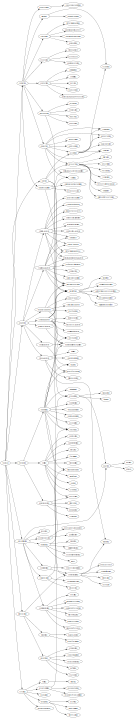

In [52]:
# create a graphviz visualization of edges
from graphviz import Digraph

dot = Digraph(comment='Tadirah')
for i, row in edges.iterrows():
    dot.edge(row['Source'], row['Target'])
    
# show graph in notebook
dot.attr(rankdir='LR')
dot.attr(size='10')
dot.render('../Data/Tadirah/tadirah', format='png')
dot


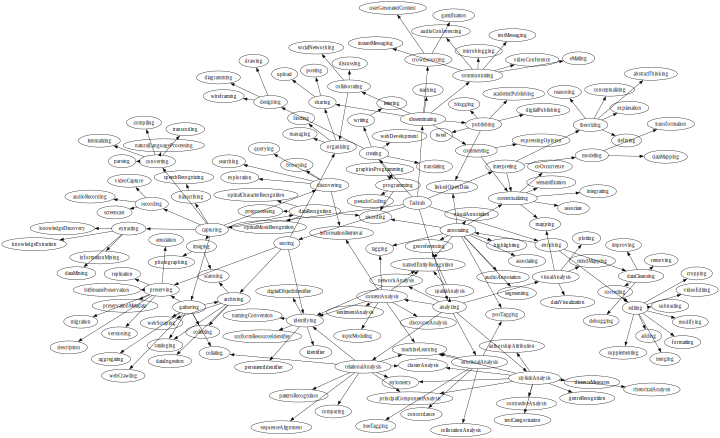

In [53]:
# create another visualization with the graphviz engine set to sfdp
dot.engine = 'sfdp'
dot.attr(rankdir='LR')
dot.attr(size='10')
dot.attr(overlap='false')
dot.render('../Data/Tadirah/tadirah_graph_sfdp', format='png')
dot

